In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras.models as tfm
from tensorflow.keras.applications.vgg16 import VGG16


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

x_train = np.stack((x_train , )*3 , axis=-1)
x_test = np.stack((x_test , )*3 , axis=-1)

In [4]:
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable = False



58889256/58889256 [==============================] - 4s 0us/step


In [5]:
model = tfm.Sequential()
for layer in base_model.layers[:-6]:
    model.add(layer)

model.add(tfl.GlobalAveragePooling2D())
model.add(tfl.Dense(256, activation='relu'))
model.add(tfl.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0         
                                                                 
 block3_conv1 (Conv2D)       (None, None, None, 256)   2

In [7]:

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.1373 - accuracy: 0.9585 - val_loss: 0.0697 - val_accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0613 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0756 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0457 - accuracy: 0.9852 - val_loss: 0.0463 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0346 - val_ac

313/313 [==============================] - 1s 4ms/step


<Axes: >

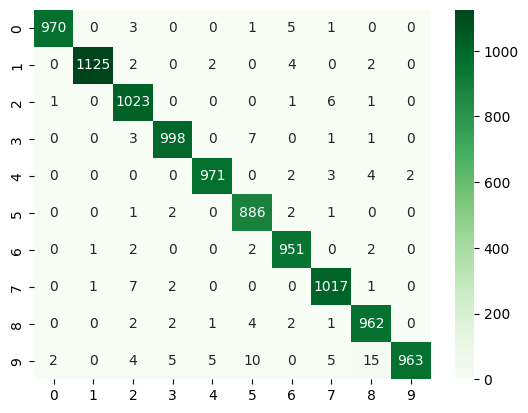

In [12]:
y_test_pred_res = np.argmax(model.predict(x_test) , axis=1)
convmat_res = confusion_matrix(y_test , y_test_pred_res)
sns.heatmap(convmat_res , annot=True , fmt='d',cmap = 'Greens')

In [13]:
print(classification_report(y_test , y_test_pred_res))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       1.00      0.95      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

